##### Metody obliczeniowe w nauce i technice

## Laboratorium 9 - Faktoryzacja QR

### Sprawozdanie sporządził: Marcin Zielonka

### Wstęp

Do realizacji zadań skorzystam z gotowych funkcjonalności zawartych w bibliotekach:
- `numpy` - wersja `1.18.2`
- `matplotlib`
- `scipy`

In [1]:
import numpy as np
from scipy.stats import ortho_group as og
from matplotlib import pyplot as plt

### Zadanie 1: Faktoryzacja QR metodą Grama-Schmidta

Napisz funkcję dokonującą faktoryacji QR macierzy $\mathbf{A}\in\mathbb{R}^{n\times{n}}$, $\mathbf{A}=[\mathbf{a_1},\mathbf{a_2},...,\mathbf{a_n}]$ ($\mathbf{a_i}$ to kolejne kolumny macierzy A) klasyczną metodą ortogonalizacji Grama-Schmidta.

Korzystając z zawartych zależności potrzebnych do napisania funkcji dokonującej faktoryzacji $QR$, tj:

Dla $k=1$:
$$\mathbf{u_1}\longleftarrow\frac{\mathbf{a_1}}{\lVert\mathbf{a_1}\rVert}$$

Dla $k>1$:
$$\mathbf{u_k}\longleftarrow\mathbf{a_k}-\sum_{i=1}^{k-1}{\langle\mathbf{u_i},\mathbf{a_k}\rangle\mathbf{u_i}}$$
$$\mathbf{u_k}\longleftarrow\frac{\mathbf{u_k}}{\lVert\mathbf{u_k}\rVert}$$

Oraz:

$$\mathbf{Q}=[\mathbf{u_1},\mathbf{u_2},...,\mathbf{u_n}]$$

$$
\mathbf{R} = 
\begin{bmatrix}
\langle\mathbf{u_1},\mathbf{a_1}\rangle & \langle\mathbf{u_1},\mathbf{a_2}\rangle & \langle\mathbf{u_1},\mathbf{a_3}\rangle & \cdots \\
0 & \langle\mathbf{u_2},\mathbf{a_2}\rangle & \langle\mathbf{u_2},\mathbf{a_3}\rangle & \cdots \\
0 & 0 & \langle\mathbf{u_3},\mathbf{a_3}\rangle & \cdots \\
\vdots & \vdots & \vdots & \ddots 
\end{bmatrix}
$$


Stworzyłem funkcję dokonującą ww. faktoryzację z wykorzystaniem funkcji dostępnych w bibliotece `numpy`:

In [2]:
def qr_gram_schmidt(A):
    m = len(A)
    n = len(A.T)
    
    Q = np.zeros(n * m).reshape(n, m)
    R = np.zeros(n * n).reshape(n, n)
    
    AT = A.T
    
    # k = 1:
    Q[0] = AT[0] / np.linalg.norm(AT[0])
    
    # k > 1:
    for k in range(1, n):
        Q[k] = AT[k]
        
        for i in range(k):
            Q[k] -= Q[i].dot(AT[k]) * Q[i]
            
        Q[k] = Q[k] / np.linalg.norm(Q[k])
    
    for i in range(n):
        for j in range(n):
            if i <= j:
                R[i][j] = Q[i].dot(AT[j])
    
    return Q.T, R

Przetestuj zaimplementowaną metodę porównując wyniki uzyskane z jej pomocą z wynikami zwracanymi przez funkcję biblioteczną. W testach wykorzystaj 4-5 macierzy losowych o różnym rozmiarze

Funkcja biblioteczna `np.linalg.qr`, która została wykorzystana do sprawdzenia poprawności zaimplementowanej funkcji, zwraca w wynikowych macierzach $Q$ i $R$ wartości takie same jak zaimplementowana funkcja, jednakże o odwrotnym znaku (nie udało mi sie wyjaśnić dlaczego zachodzi taka sytuacja, jednakże porównując wynik zaimplementowanej funkcji dla przykładu ze strony https://pl.wikipedia.org/wiki/Rozk%C5%82ad_QR - jest on taki sam jak zamieszczony na wspomnianej stronie).

Dlatego też przy pisaniu funkcji, która sprawdza poprawność wyników, objąłem wszystkie wartości w macierzach na moduł wartości bezwględnej, aby sprawdzić same wartości.

In [3]:
for i in range(5):
    n = np.random.randint(5, 20)
    A = np.random.randint(40, size=(n, n))

    Q1, R1 = qr_gram_schmidt(A)
    Q2, R2 = np.linalg.qr(A)
    
    result = np.allclose(np.abs(Q1), np.abs(Q2)) and np.allclose(np.abs(R1), np.abs(R2))
    
    print(f'matrix {n}x{n}:\t {result}')

matrix 10x10:	 True
matrix 14x14:	 True
matrix 14x14:	 True
matrix 9x9:	 True
matrix 7x7:	 True


Jak widać, dla macierzy o losowych rozmiarach i losowych wartościach, wyniki dla obu funkcji są zgodne.

Wygeneruj 30-50 przykładowych macierzy $8\times{8}$ o różnym wskaźniku uwarunkowania $\mathbf{cond(A_i)}$ (stosunek największej do najmniejszej wartości osobliwej). Wykorzystaj w tym celu SVD oraz biblioteczną funkcję realizującą dekompozycję QR (potrzebne będą dwie losowe macierze ortogonalne oraz diagonalna macierz odpowiednio szybko malejących wartości osobliwych).

W celu wygenerowania macierzy zgodnie z poleceniem, napisałem funkcję, która zwróci listę macierzy, w której każda kolejna macierz będzie miała wskaźnik uwarunkowania $\mathbf{cond(A_i)}$ większy o $7$ od poprzedniej. Pierwsza macierz na liście będzie miała wartość wskaźnika uwarunkowania równą $17$.

Aby osiągnąć zamerzony cel, wykorzystałem rozkład macierzy na wartości osobliwe SVD - a dokładniej zastosowałem proces odwrotny, aby uzyskać macierz na podstawie rozkładu.

Na początku wygenerowałem listę $S$ wartości osobliwych, które rozkładają się równomiernie w danym przedziale uwarunkowanym danym dla $i$-tej macierzy wskaźnikiem uwarunkowania. Następnie utworzyłem macierz diagonalną $D$ na podstawie wartości osobliwych zawartych w liście $S$. 

Do wygenerowania losowych macierzy ortogonalnych wykorzystałem funkcję dostępną w module biblioteki `scipy` - `ortho_group.rvs`, która przyjmuje m.in parameter dim, dzięki któremu możemy ustalić rozmiar wynikowej macierzy.

Następnie zbudowałem macierz $\mathbf{A_i}$ zgodnie ze wzorem: $\mathbf{A}=\mathbf{U\Sigma{V}}$

In [4]:
def generate_matrixes(n):
    result = []
    
    for i in range(n):
        cond = 7 * (i + 1) + 10
        
        # singular values:
        S = np.linspace(10, cond, 8)
        
        D = np.diag(S)
        U = og.rvs(dim=8)
        V = og.rvs(dim=8)
        
        result.append(np.dot(U, np.dot(D, V)))
    
    return result

Następnie wywołałem funkcję, aby wygenerowaną listę macierzy wykorzystać w kolejnym zadaniu

In [5]:
M = generate_matrixes(40)

Dla każdej z uzyskanych w ten sposób macierzy $\mathbf{A_i}$ wyznacz faktoryzację $QR$ korzystając z zaimplementowanej funkcji ($\mathbf{A_i} = \mathbf{Q_iR_i}$). Przedstaw zależność $\lVert\mathbf{I}−\mathbf{Q}^T_i\mathbf{Q}_i\rVert$ od $\mathbf{cond(A_i)}$.

W celu uzyskania wartości $\mathbf{Q_i^T}$  oraz $\mathbf{Q_i}$ wykorzystałem wcześniej zaimplementowaną funkcję do faktoryzacji $QR$, a do obliczenia współczynnika uwarunkowania $\mathbf{cond(A_i)}$ wykorzystałem funkcję `np.linalg.svd`, która jest dostępna w bibliotece `numpy`.

Do wyrysowania wykresu wykorzystałem bibliotekę `matplotlib`.

In [6]:
def show_relationship(M):
    xs = []
    ys = []
    
    I = np.ones(8 * 8).reshape(8, 8)
    
    for A in M:
        Q, R = qr_gram_schmidt(A)
        U, D, V = np.linalg.svd(A)
        
        xs.append((D[0] - D[7]))
        ys.append(np.linalg.norm(I - np.dot(Q.T, Q)))
    
    plt.plot(xs, ys, 'bo', markersize=1)
    plt.ylim(top=7.50)
    plt.ylim(bottom=7.48)
    plt.show()

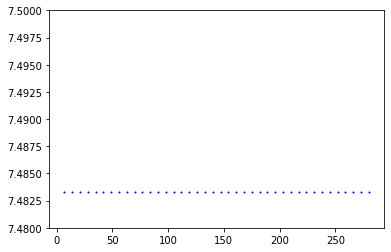

In [7]:
show_relationship(M)

Zinterpretuj wyniki. Jaka jest przyczyna uzyskanych rozbieżności? Od czego zależy wielkość rozbieżności?

Analizując wykres mozemy zauważyć, iż wartość $\lVert\mathbf{I}−\mathbf{Q}^T_i\mathbf{Q}_i\rVert$ nie zależy od $\mathbf{cond(A_i)}$ i utrzymuje się na stałym poziomie o wartości ok. $7.843$.

### Zadanie 2: Rozwiązywanie układów równań metodą QR

Napisz funkcję rozwiązującą nadokreślony układ równań liniowych metodą $QR$ korzystając z własności macierzy ortogonalnych: $\mathbf{A}^T=\mathbf{A}^{−1}$, a także z mechanizmu *back substitution*. Następnie wykorzystaj ją do rozwiązania problemu aproksymacji średniokwadratowej dla zbioru punktów podanego tabeli poniżej. Przyjmij model postaci:

$$f(x)=\alpha_0+\alpha_1x+\alpha_2x^2$$

Przedstaw wizualizację uzyskanego wyniku (punkty oraz funkcja aproksymująca $f$

|x|-5|-4|-3|-2|-1|0 |1 |2 |3 |4 |5 |
|-|--|--|--|--|--|--|--|--|--|--|--|
|y|2 |7 |9 |12|13|14|14|13|10|8 |4 |

Na początku umieściłem wartości $x$ i $y$ w odpowiednich zmiennych:

In [8]:
xs = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
ys = [2, 7, 9, 12, 13, 14, 14, 13, 10, 8, 4]

Następnie napisałem funkcję, która rozwiązuje nadokreślony układ równań liniowych metodą $QR$. Przy implementacji funkcji, wykorzystałem materiały dostępne pod adresem http://home.agh.edu.pl/~chwiej/mn/uarl_direct.pdf (strona 26 i 27), a dokładniej wyprowadzaną zależność:

$$A\mathbf{x}=\mathbf{b} \Rightarrow A^TA\mathbf{x}=A^T\mathbf{b}$$
$$R^TQ^TQR\mathbf{x}=R^TQ^T\mathbf{x}$$
$$Q^TQ=D \Rightarrow R^TDR\mathbf{x}=R^TQ^T\mathbf{b}$$
$$DR\mathbf{x}=Q^T\mathbf{b}$$

In [9]:
def qr_solve(A, B):
    Q, R = np.linalg.qr(A)
    
    QT = Q.T
    RT = R.T
    D = QT @ Q
    
    DR = D @ R
    
    QTB = QT @ np.array([B]).T
    
    return np.linalg.solve(DR, QTB)

Nastepnie przygotowałem odpowiednio macierze $A$ i $B$ na podstawie punktów $x$ i $y$, tak aby można było przekazać je jako parametry zaimplmentowanej wcześniej funkcji:

In [10]:
A = np.array([[1, x, x * x] for x in xs])
B = ys

X = qr_solve(A, B)

print(X)

[[13.97202797]
 [ 0.18181818]
 [-0.43356643]]


Ostatecznie utworzyłem funkcję pomocniczą, która przy użyciu biblioteki `matplotlib` wyrysowuje punkty $(x,y)$ oraz wyznaczoną wcześniej funkcję

In [11]:
def show_results(xs, ys, f):
    ys_f = list(map(f, xs))
    plt.plot(xs, ys, 'bo', markersize=3)
    plt.plot(xs, ys_f, 'r')
    
    plt.show()
    

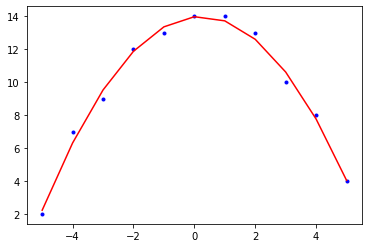

In [12]:
f = lambda x: 13.97202797 + 0.18181818 * x - 0.43356643 * x * x
show_results(xs, ys, f)

Jak widać zaimplentowana funkcja działa poprawnie, a dowodem na to jest fakt, iż otrzymana funkcja obejmuje każdy z punktów z bardzo małym błędem, co było istotą aproksymacji i rozwiązania układu nadokreślonego.